# Manipulation de la librairie networkx

## Construction de réseaux d'interactions à partir de données MITAB.

Le format (MITAB) stocke des paires de protéines en interaction. Dans ce format, chaque colonne porte une information spécifique.
Une description du format est disponible [ici](https://psicquic.github.io/MITAB27Format.html).
Les données d'interactions impliquant les protéines surreprésentées de l'expérience ont été obtenues depuis la base de données [Intact](https://www.ebi.ac.uk/intact/home).
Ces données sont mises à votre disposition dans le fichier `data/proteins.mitab`.

Vous extrairez du fichier les paires d'identifiants uniprot des protéines en interaction.

Ces paires de protéines constituent un réseau d'interaction protéine-protéine que vous allez dessiner à l'aide de la libraire [networkx](https://networkx.org/documentation/stable/reference).
Le code suivant vous est fourni à titre d'exemple.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

fig, ax = plt.subplots(figsize=(8, 8))

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['blue','blue','red'] , node_size=2000)
```


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
prot = pd.read_csv("../proteins.mitab", sep="\t", header=None)
prot
prot[0] = prot[0].str.replace('uniprotkb:', '')
prot[1] = prot[1].str.replace('uniprotkb:', '')
prot
accession = prot[[0,1]]
#accession

In [3]:
df = pd.read_csv("../TCL_wt1.tsv", sep="\t", na_values="#VALEUR!", 
                   dtype={'Accession':str,
                          'Description':str,
                          'Gene Symbol':str,
                          'Corrected Abundance ratio (1.53)':np.float64,
                          'Log2 Corrected Abundance Ratio':np.float64,
                          'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)':np.float64,
                          'LOG10 Adj.P-val':np.float64}).dropna()
#df
abundance_prot = list(df.Accession[df["Log2 Corrected Abundance Ratio"] > -0.097])
abundance_prot
experience_prot =list(df.Accession)
experience_prot

['P75936',
 'P76231',
 'P0A8S9',
 'P05706',
 'P29744',
 'P0A9A2',
 'P75937',
 'P43533',
 'P0ABR1',
 'P26608',
 'P0ABH9',
 'P52614',
 'P0ACY9',
 'P0C054',
 'P69741',
 'P06959',
 'P0AER0',
 'P52613',
 'P0AGK8',
 'P24216',
 'P0AEM4',
 'P09373',
 'P52643',
 'P04982',
 'P0AFP6',
 'P0A9G6',
 'P33602',
 'P0A759',
 'P41409',
 'P37646',
 'Q46938',
 'P06721',
 'P0ABX5',
 'P31979',
 'P0AFG3',
 'P11349',
 'P64490',
 'P64614',
 'P68066',
 'P0AC38',
 'P15038',
 'P33235',
 'P0C058',
 'P0AEM6',
 'P28248',
 'P0A8L1',
 'P0AAJ5',
 'P0A9S3',
 'P0AAS0',
 'P0AFG6',
 'P77808',
 'P64599',
 'P09152',
 'P13445',
 'P0A794',
 'P0A7P5',
 'P14294',
 'P64585',
 'P0AET8',
 'P17445',
 'P21889',
 'P07004',
 'P76440',
 'P0AGL5',
 'P12758',
 'P33570',
 'P0AE58',
 'P0AES2',
 'P07813',
 'P27302',
 'P0A7S3',
 'P0A8G3',
 'P0A9B2',
 'P11557',
 'P0A722',
 'P07118',
 'P0AG07',
 'P12996',
 'P0AF18',
 'P06993',
 'P0ADS6',
 'P0ABP8',
 'P0AC16',
 'P0A853',
 'P0ABD3',
 'P69922',
 'P0ABU0',
 'P0A7J0',
 'P0A9C5',
 'P76187',
 'P04128',

In [102]:
abundance_prot

['P39831',
 'P0AG78',
 'P0A9H1',
 'P60955',
 'P0AB52',
 'P0AB28',
 'P77338',
 'P0AFJ5',
 'P09833',
 'P0AEK2',
 'P33030',
 'P23173',
 'P60390',
 'P0AB98',
 'P0A7M6',
 'P0A921',
 'P0A7M9',
 'P0A7T3',
 'P02358',
 'P0AC69',
 'P75818',
 'P0AGI1',
 'P23894',
 'P68919',
 'P0ACG1',
 'P0A903',
 'P45799',
 'P0A7A5',
 'P0ADE4',
 'P02943',
 'P77774',
 'P0A940',
 'P0ADN6',
 'P0A6K3',
 'P0AEQ1',
 'P09169',
 'P05825',
 'P0ADB7',
 'P0A915',
 'P39180',
 'P0ACF8',
 'P0A7K2',
 'P0A7G2',
 'P0A937',
 'P0A9L8',
 'P62399',
 'P0AER8',
 'P0A905',
 'P76471',
 'P76506',
 'P13036',
 'P0A927',
 'P0AB46',
 'P10384',
 'P06971',
 'P0A910',
 'P0A908',
 'P75780',
 'P06996',
 'P46474',
 'P76344',
 'P06129',
 'P77330',
 'P02930',
 'P0A917',
 'P02931',
 'P0AB40']

In [15]:
dic={}
for i in range(len(accession)):
    if accession[0][i] in dic :
        dic[accession[0][i]] +=1
    else :
        dic[accession[0][i]]=1
    if accession[1][i] in dic :
        dic[accession[1][i]] +=1
    else :
        dic[accession[1][i]]=1


In [16]:
size=[]
for i in G.nodes:
    size.append(dic[i]*100)
#size

In [10]:
nodes_color=[]
for i in G.nodes:
    if i in abundance_prot:
        nodes_color.append("red")
    else:
        nodes_color.append("green")
#node_color


nodes_color=[]
for i in G.nodes:
    if i in experience_prot :
        if i in abundance_prot:
            nodes_color.append("red")
        else:
            nodes_color.append("green")
    else:
        nodes_color.append("yellow")

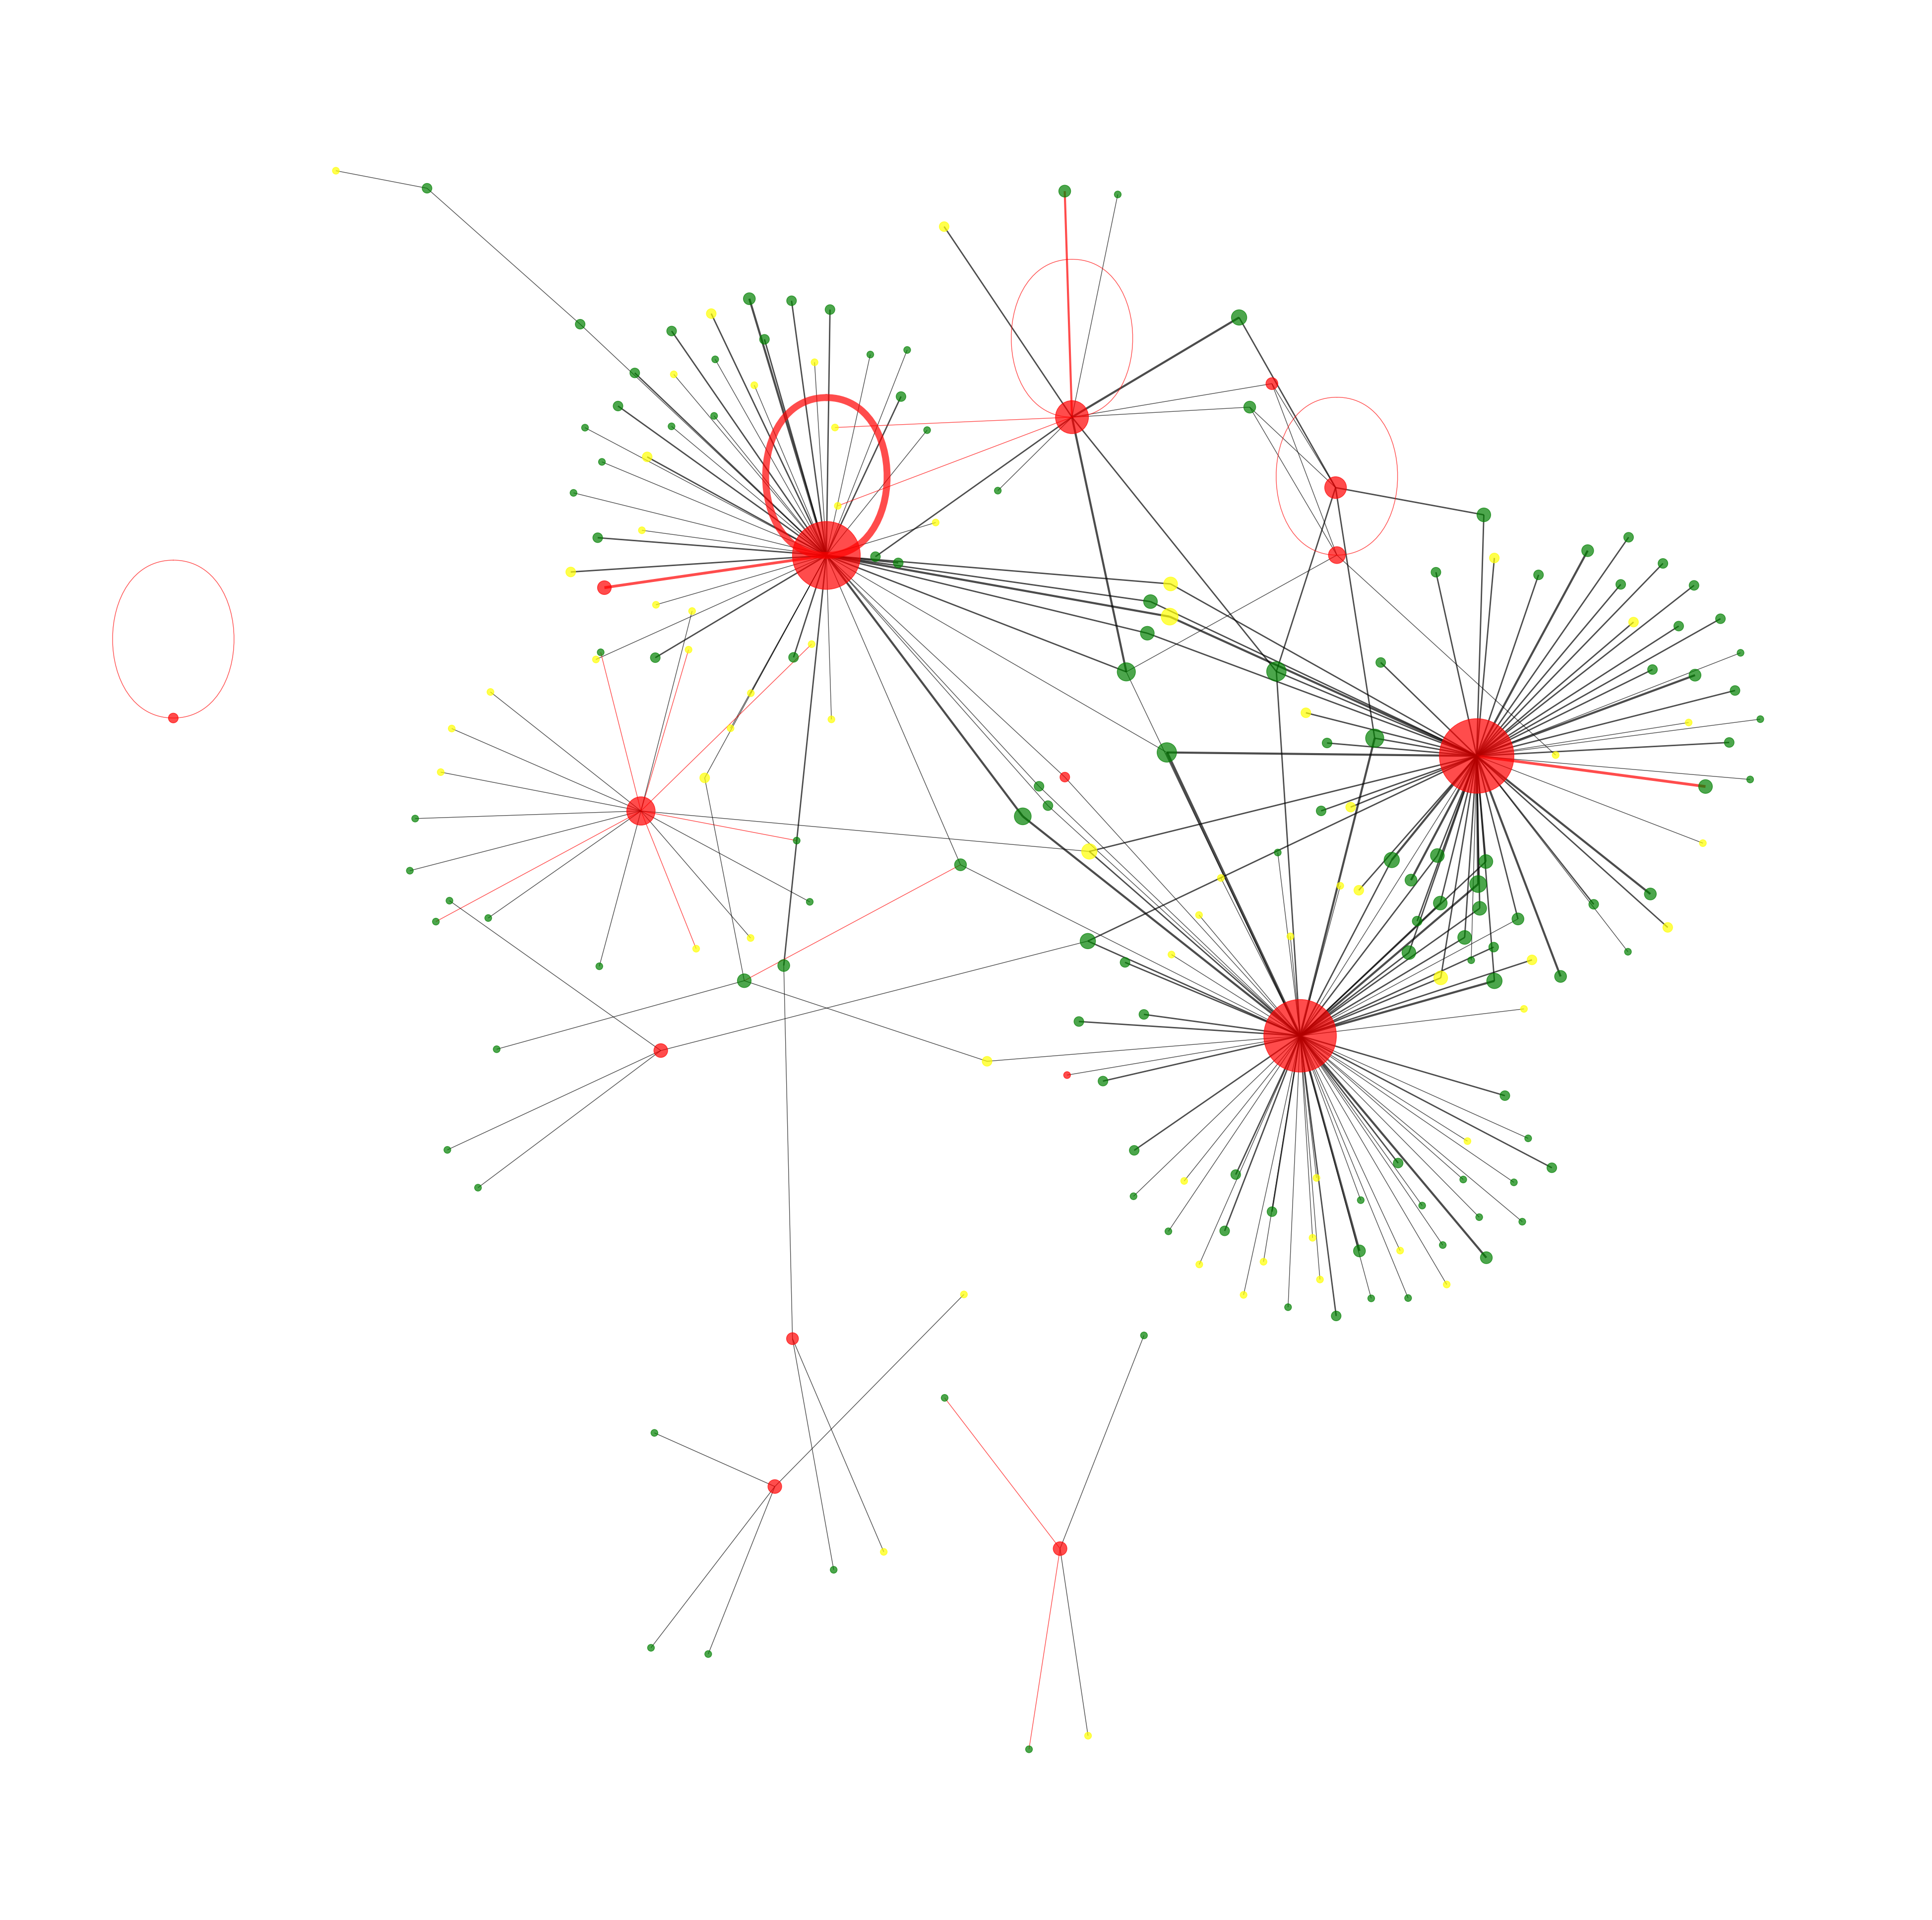

In [11]:
G = nx.Graph()

fig, ax = plt.subplots(figsize=(50, 50))

for l in range(len(accession)) :
    #G.add_edge(accession[0][l], accession[1][l])
    protA=accession[0][l]
    protB=accession[1][l]
    #si on a pas encore croisé l'arête, on lui attribue une valeur de 0. Dans tous les cas on incrémente sa valeur
    if not G.has_edge(protA, protB):
        G.add_edge(protA,protB,count=0)
    G[protA][protB]['count']+=1

##definition de la largeur des arêtes
#on parcours la liste des arêtes, et on récupère les valeurs de count pour chaque couple, 
#ces valeurs représenterons la largeur du trait (ATTENTION il faut les valeurs dans le même ordre que G.edges)
width=[]
final_width=[]
for edge in G.edges:
    width.append(G.get_edge_data(edge[0],edge[1])) # G.get_edge_data(*edge)
for dic in width:
    final_width.append(dic['count'])

##definition des edges en rouge si ils ont au moins une interaction physique
physical_inter_clean=[]

physical_inter = (prot[[0,1]][prot[11].str.contains('physical')]).values.tolist()

for l in physical_inter :
    physical_inter_clean.append(tuple(l))
len(physical_inter_clean)

colors=[]
for edge in G.edges:
    if edge in physical_inter_clean :
        colors.append("red")
    else :
        colors.append("black")
        

##dessin du graphe
pos = nx.spring_layout(G,k=0.2)
nx.draw(G, pos, node_size=size, width=final_width, edge_color=colors, node_color=nodes_color,alpha=0.7)

In [23]:
dic={}
for i in range(len(accession)):
    if accession[0][i] in dic :
        dic[accession[0][i]] +=1
    else :
        dic[accession[0][i]]=1
    if accession[1][i] in dic :
        dic[accession[1][i]] +=1
    else :
        dic[accession[1][i]]=1

size1=[]
for i in G1.nodes:
    size.append(dic[i]*100)

In [ ]:
physical_inter_clean=[]

physical_inter = (prot[[0,1]][prot[11].str.contains('physical')]).values.tolist()

for l in physical_inter :
    physical_inter_clean.append(tuple(l))
len(physical_inter_clean)

In [78]:
nodes_color=[]
for i in G1.nodes:
    if i in abundance_prot:
        nodes_color.append("red")
    else:
        nodes_color.append("green")
#node_color

'''
nodes_color=[]
for i in G1.nodes:
    if i in experience_prot :
        if i in abundance_prot:
            nodes_color.append("red")
        else:
            nodes_color.append("green")
    else:
        nodes_color.append("yellow")'''

'\nnodes_color=[]\nfor i in G1.nodes:\n    if i in experience_prot :\n        if i in abundance_prot:\n            nodes_color.append("red")\n        else:\n            nodes_color.append("green")\n    else:\n        nodes_color.append("yellow")'

In [69]:
gradient_color=df[['Accession','Log2 Corrected Abundance Ratio']]

'''   
nodes=[]    
for node in G1.nodes:
    nodes.append'''
gradient_color
dic_col={}
for i in gradient_color.iloc:
    if i[0] not in dic_col :
        dic_col[i[0]]=i[1]
node_col=[]
for node in G.nodes:
    if node in dic_col:
        node_col.append(dic_col[node])
node_col

[-0.819427754,
 -0.013261899,
 0.11504195,
 -0.955434448,
 -0.545892936,
 -0.775184916,
 0.18140401,
 -0.56250765,
 0.461658661,
 -1.421969002,
 -1.081464101,
 0.372697227,
 -0.67844913,
 -1.261903324,
 -0.399406848,
 -0.389491379,
 -2.518620006,
 -0.446173725,
 0.811390435,
 0.588102208,
 -0.196691911,
 -0.629489227,
 -0.686014407,
 -0.344498506,
 -0.971985624,
 -0.619314006,
 0.018736563,
 -0.268703156,
 -0.399406848,
 -2.303191532,
 -0.935459748,
 -1.377192114,
 0.279442162,
 -0.735394886,
 -0.819427754,
 -0.428299399,
 -1.202105407,
 -1.128104826,
 -0.763932642,
 -0.7291291,
 -0.754357197,
 -0.38332864,
 -0.108657064,
 -0.349295502,
 -0.283547003,
 -1.219566377,
 -0.858216749,
 -0.394440595,
 -0.295070188,
 -0.870232125,
 -0.797956224,
 -0.880611271,
 -0.210809476,
 -0.942691317,
 -0.663436559,
 -0.236130222,
 -0.773572065,
 -0.568088682,
 -0.178436501,
 -0.38332864,
 -1.0,
 -0.586377601,
 -1.483918915,
 -0.387023123,
 -1.097516506,
 0.056402183,
 -0.394440595,
 -0.511881577,
 -0.6

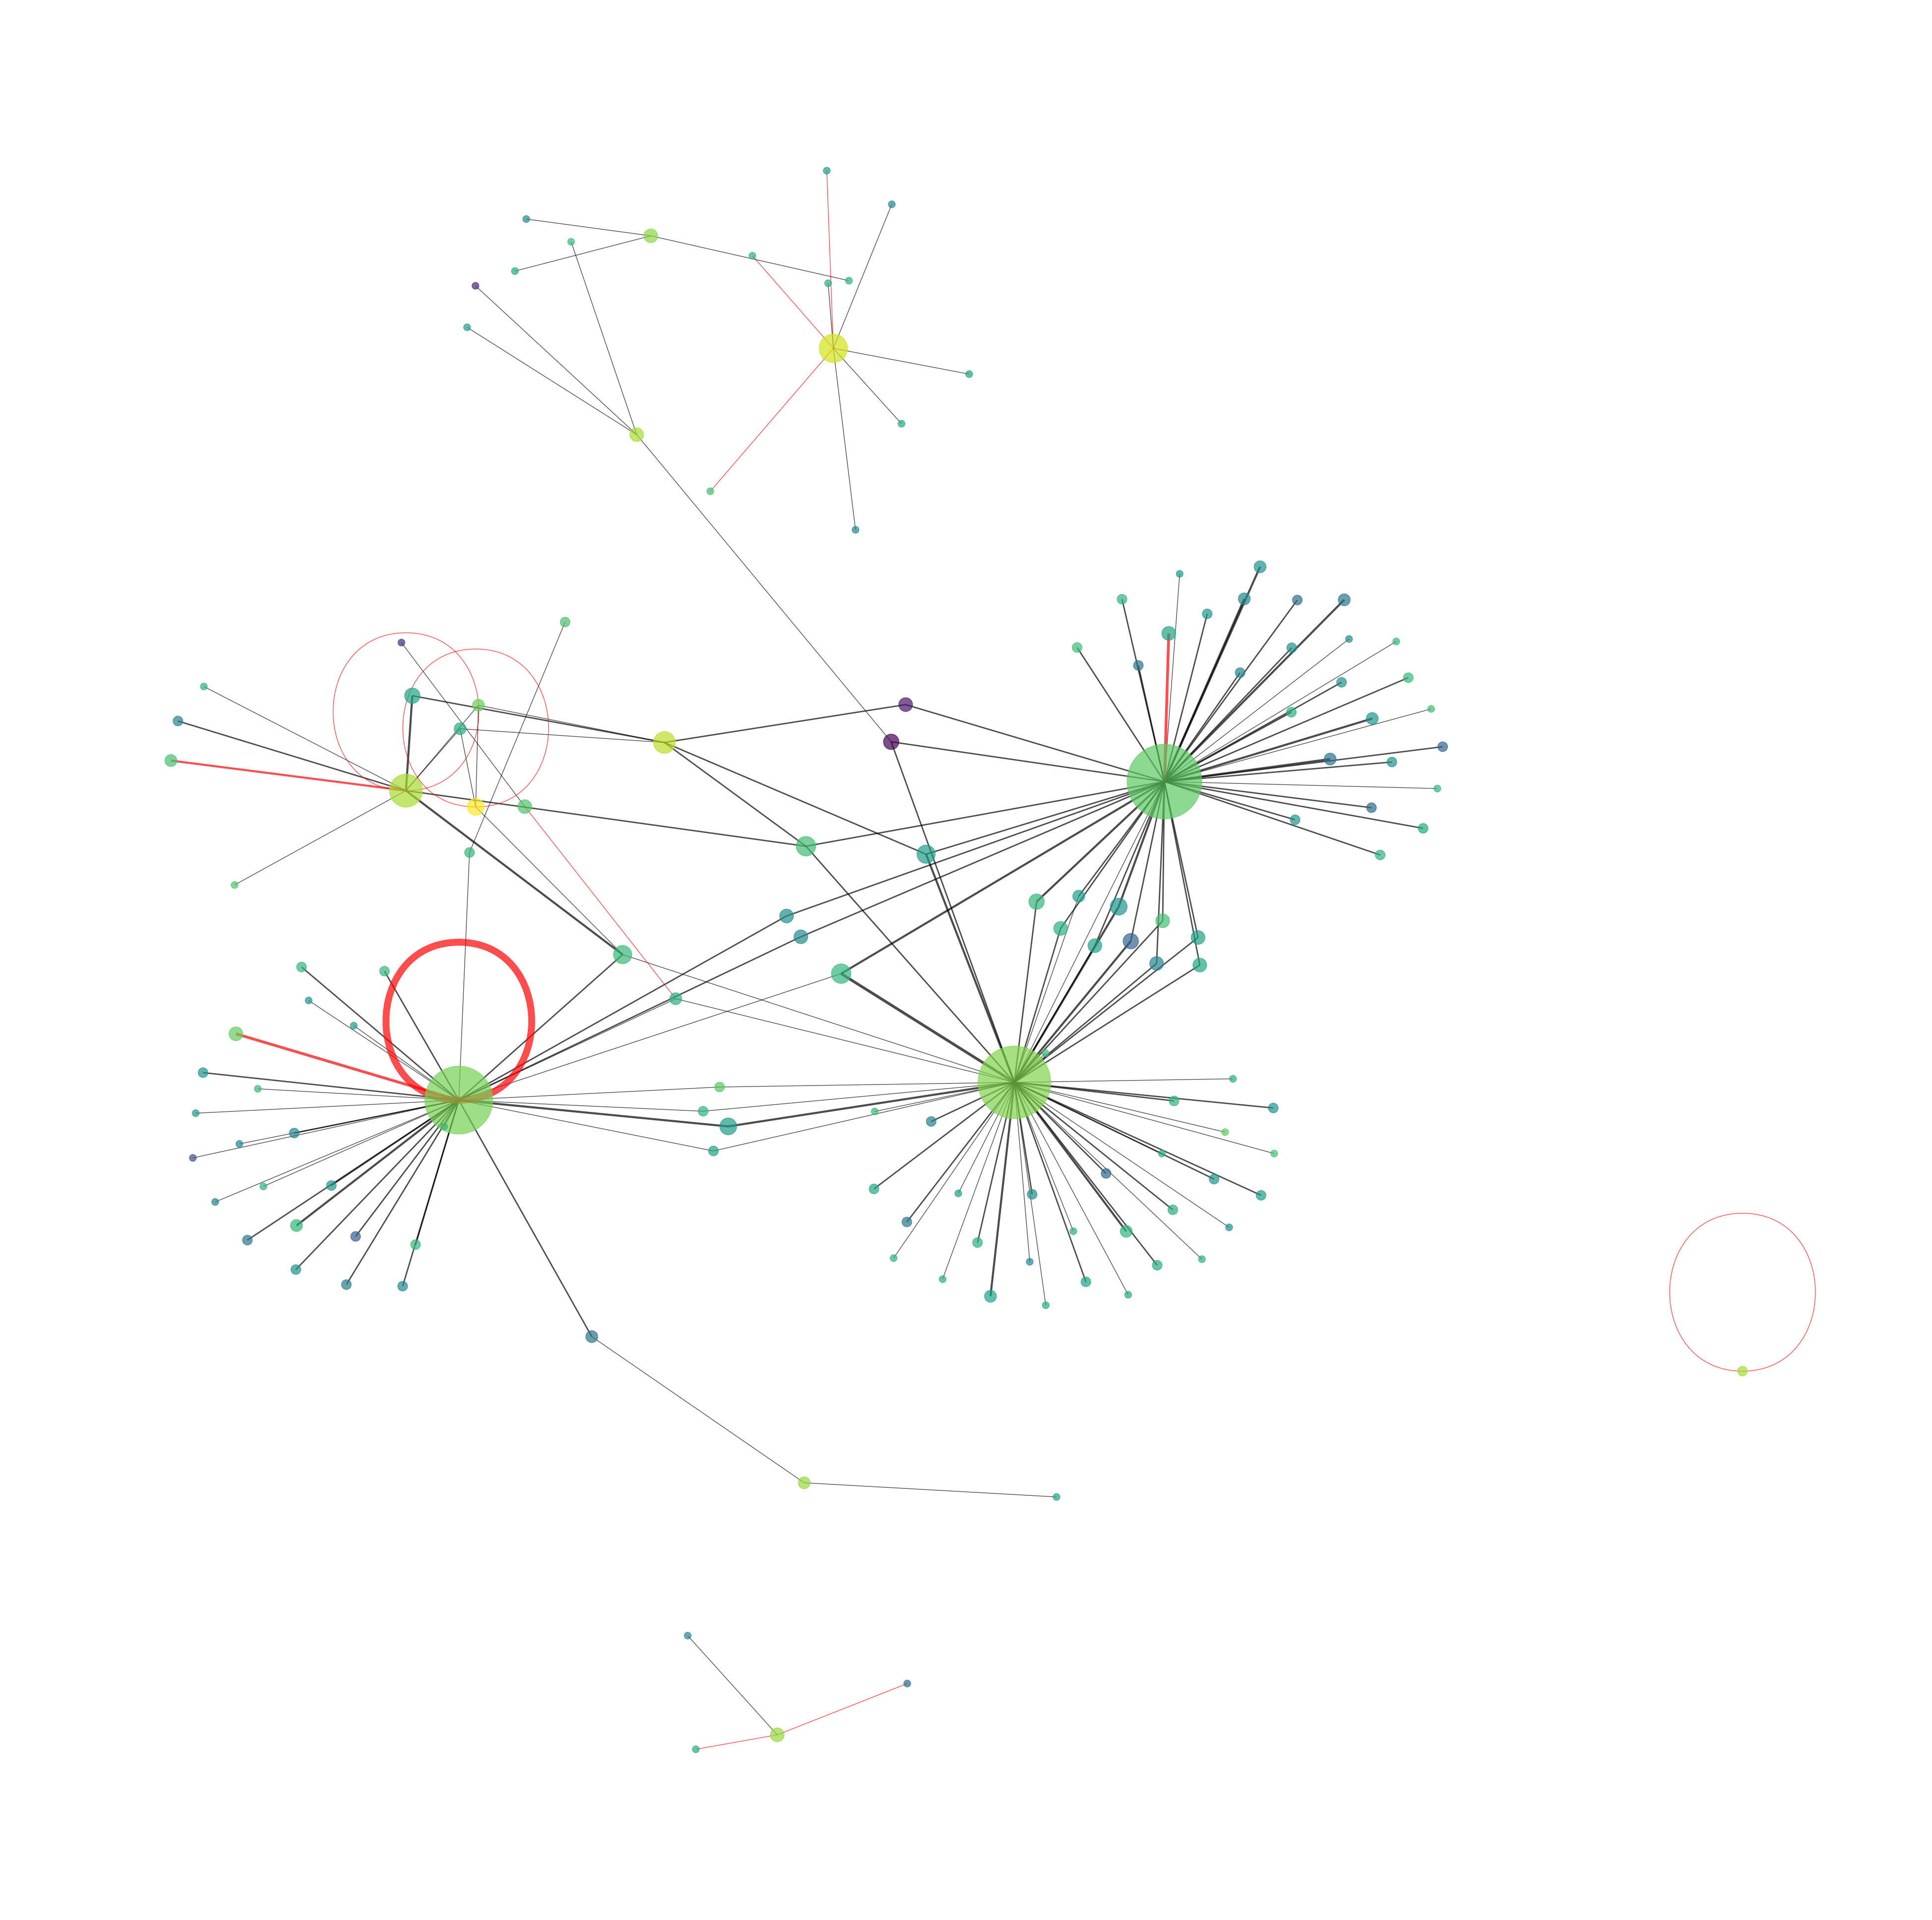

In [79]:

        
G1 = nx.Graph()

fig, ax = plt.subplots(figsize=(50, 50))


for l in range(len(accession)) :
    #G.add_edge(accession[0][l], accession[1][l])
    protA=accession[0][l]
    protB=accession[1][l]
    if (protA in experience_prot) and (protB in experience_prot) :
        #print(protA,protB)
        #si on a pas encore croisé l'arête, on lui attribue une valeur de 0. Dans tous les cas on incrémente sa valeur
        if not G1.has_edge(protA, protB):
            G1.add_edge(protA,protB,count=0)
        G1[protA][protB]['count']+=1

##definition de la largeur des arêtes
##on parcours la liste des arêtes, et on récupère les valeurs de count pour chaque couple, 
##ces valeurs représenterons la largeur du trait (ATTENTION il faut les valeurs dans le même ordre que G.edges)
width=[]
final_width=[]
for edge in G1.edges:
    width.append(G1.get_edge_data(edge[0],edge[1])) # G.get_edge_data(*edge)
for dic in width:
    final_width.append(dic['count'])

##definition des edges en rouge si ils ont au moins une interaction physique
physical_inter_clean=[]

physical_inter = (prot[[0,1]][prot[11].str.contains('physical')]).values.tolist()

for l in physical_inter :
    physical_inter_clean.append(tuple(l))
len(physical_inter_clean)

colors=[]
for edge in G1.edges:
    if edge in physical_inter_clean :
        colors.append("red")
    else :
        colors.append("black")
       

##dessin du graphe
pos = nx.spring_layout(G,k=0.2)
nx.draw(G1, pos, node_size=size, width=final_width, edge_color=colors,alpha=0.7,node_color=node_col, cmap=plt.cm.viridis)
#, width=final_width, edge_color=colors, node_color=nodes_color,alpha=0.7
#

In [97]:
accession_exp=[]
for i in range(len(prot)):
    print(prot[[0,1]][i])
#accession = prot[[0,1]]

0      P0A6X3
1      P0ACF8
2      P0A6Y1
3      P36659
4      P0ACF8
        ...  
385    P0ABS8
386    P0ADN0
387    P0A9X4
388    P0A6Y1
389    P42641
Name: 0, Length: 390, dtype: object
0      P02358
1      P0AFG8
2      P02358
3      P62399
4      P0ACF8
        ...  
385    P0ACF8
386    P76344
387    P62399
388    P62399
389    P0ACF8
Name: 1, Length: 390, dtype: object


KeyError: 2

In [54]:
'''width=[]
final_width=[]
for edge in G.edges:
    width.append(G.get_edge_data(edge[0],edge[1])) # G.get_edge_data(*edge) G.[edge[0]],[edge[1]]
for dic in width:
    final_width.append(dic['count'])'''
#sorted(final_width)

physical_inter_clean=[]

physical_inter = (prot[[0,1]][prot[11].str.contains('physical')]).values.tolist()

for l in physical_inter :
    physical_inter_clean.append(tuple(l))
len(physical_inter_clean)

'''G.edges
G['P0A6X3']['P02358']
edge_width ={}
for edge in G.edges:
    edge_width()
    
intercount = accession.value_counts().to_dict()
intercount
width=[]
for edge in G.edges:
    width.append(intercount[edge])'''

44

Les positions des noeuds sont paramétrables au travers de l'objet [layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html). Une fois une première représentation du réseau obtenue, affinez celle-ci afin de:

* Écrire les identifiants uniprot dans les noeuds du réseau.
* Faire du diamètre des noeuds une fonction du nombre de partenaires protéiques.
* Faire de la largeur des arêtes une fonction du nombre d'experiences (lignes MITAB) detectant cette interaction
* Colorier les arêtes soutenues par au moins une interaction de type physique entre proteines.


## Croisement des données d'interaction et de protéomique

En utilisant les données d'abondance du fichier `TCL_wt1.tsv`, essayez de modifier le rendu du réseau pour:
* colorier dans une couleur spécifique uniquement les protéines surabondantes dans l'expérience.
* N'afficher que les noeuds des protéines mesurées dans l'experience.
* Utiliser une échelle de couleur continue fonction de l'abondance pour colorier les noeuds.
* colorier les protéines appartenant à des classes GO communes.